# Now let's start extracting concepts from unstructured text!


In [1]:
# Install medcat into the local environment
! pip install medcat==1.2.7

**Restart the runtime if on colab, sometimes necessary after installing models**

In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

from matplotlib import pyplot as plt
from medcat.cat import CAT

In [4]:
DATA_DIR = "./data/"
model_pack_path = DATA_DIR + "medmen_wstatus_2021_oct.zip"

In [5]:
# Download the models and required data
!wget https://medcat.rosalind.kcl.ac.uk/media/medmen_wstatus_2021_oct.zip -P ./data/
!wget https://raw.githubusercontent.com/CogStack/MedCATtutorials/main/notebooks/introductory/data/pt_notes.csv -P ./data/

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## Loading the MedCAT modelpack

In [6]:
# Load model pack and Create CAT - the main class from medcat used for concept annotation
cat = CAT.load_model_pack(model_pack_path)


Found an existing unziped model pack at: ./data\medmen_wstatus_2021_oct, the provided zip will not be touched.
{
  "Model ID": null,
  "Last Modifed On": null,
  "History (from least to most recent)": [],
  "Description": "No description",
  "Source Ontology": null,
  "Location": null,
  "MetaCAT models": {},
  "Basic CDB Stats": {},
  "Performance": {
    "ner": {},
    "meta": {}
  },
  "Important Parameters (Partial view, all available in cat.config)": {
    "config.ner['min_name_len']": {
      "value": 3,
      "description": "Minimum detection length (found terms/mentions shorter than this will not be detected)."
    },
    "config.ner['upper_case_limit_len']": {
      "value": 3,
      "description": "All detected terms shorter than this value have to be uppercase, otherwise they will be ignored."
    },
    "config.linking['similarity_threshold']": {
      "value": 0.2,
      "description": "If the confidence of the model is lower than this a detection will be ignore."
    },
 

## Testing Named Entity Recognition + Linking (NER+L)

In [7]:
text = "He was diagnosed with kidney failure"
doc = cat(text)
print(doc.ents)

(diagnosed, kidney failure)


In [8]:
# To see all entities and corresponding meta-data
cat.get_entities("He was diagnosed with kidney failure", only_cui=False)

{'entities': {0: {'pretty_name': 'Diagnosis',
   'cui': 'C0011900',
   'type_ids': ['T060'],
   'types': ['Diagnostic Procedure'],
   'source_value': 'diagnosed',
   'detected_name': 'diagnosed',
   'acc': 0.3913008909798732,
   'context_similarity': 0.3913008909798732,
   'start': 7,
   'end': 16,
   'icd10': [],
   'ontologies': [],
   'snomed': [],
   'id': 0,
   'meta_anns': {'Status': {'value': 'Affirmed',
     'confidence': 0.9999933838844299,
     'name': 'Status'}}},
  2: {'pretty_name': 'Kidney Failure',
   'cui': 'C0035078',
   'type_ids': ['T047'],
   'types': ['Disease or Syndrome'],
   'source_value': 'kidney failure',
   'detected_name': 'kidney~failure',
   'acc': 1.0,
   'context_similarity': 1.0,
   'start': 22,
   'end': 36,
   'icd10': [],
   'ontologies': [],
   'snomed': [],
   'id': 2,
   'meta_anns': {'Status': {'value': 'Affirmed',
     'confidence': 0.9999961853027344,
     'name': 'Status'}}}},
 'tokens': []}

In [9]:
# If we want to see the CUI (ID) for each entity
for ent in doc.ents:
    print(ent, " - ", ent._.cui)

diagnosed  -  C0011900
kidney failure  -  C0035078


In [10]:
# To show type_ids and types for each entity
for ent in doc.ents:
  print(ent, " - ", cat.cdb.cui2type_ids.get(ent._.cui))

diagnosed  -  {'T060'}
kidney failure  -  {'T047'}


In [11]:
# We can also show the entities in a nicer way using displacy form spaCy
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

## Load the data

In [12]:
# Load the dataset - the one we saved in the last step of Part 2.
#If using MIMIC-III this is a very big dataset, be careful with memory requirements.
data = pd.read_csv(DATA_DIR + "pt_notes.csv")

C:\Users\morio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
# In this step we are only interested in the *text* column
data.head()

ROW_ID_x  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0       174       22532  167853.0  2151-08-04       NaN       NaN   
1       180       20646  134727.0  2112-12-10       NaN       NaN   
2       182       56174  163469.0  2118-08-12       NaN       NaN   
3       183       56174  189681.0  2118-12-09       NaN       NaN   
4       223        5350  169684.0  2143-04-30       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  ... CREATE_YEAR  ROW_ID_y  \
0  Discharge summary      Report   NaN      NaN  ...        2151     21265   
1  Discharge summary      Report   NaN      NaN  ...        2112     19484   
2  Discharge summary      Report   NaN      NaN  ...        2118     35073   
3  Discharge summary      Report   NaN      NaN  ...        2118     35073   
4  Discharge summary      Report   NaN      NaN  ...        2143      5069   

   GENDER         DOB                  DOD             DOD_HOSP  \
0       F  2064-08-20                  NaN                  NaN   
1       F  2030-05-27  2112-12-10 00:00:00  2112-12-10 00:00:00   
2       F  2073-12-25                  NaN                  NaN   
3       F  2073-12-25                  NaN                  NaN   
4       M  2076-08-18  2151-05-03 00:00:00                  NaN   

               DOD_SSN EXPIRE_FLAG  DOB_YEAR  AGE_YEAR  
0                  NaN           0      2064        87  
1  2112-12-10 00:00:00           1      2030        82  
2                  NaN           0      2073        45  
3                  NaN           0      2073        45  
4  2151-05-03 00:00:00           1      2076        67  

[5 rows x 21 columns]

In [14]:
data = data[:20000]

In [15]:
len(data)

20000

## Run unsupervised training

In [16]:
# The first step that we want to do when using MedCAT is unsupervised training.
# You can find a full explanation of this process in the paper:
# https://doi.org/10.1016/j.artmed.2021.102083

# Print statistics on the CDB before training (note that if you are using the 
#medmen cdb it will already have some training)

cat.cdb.print_stats()

# Run the annotation procedure over all the documents we have,
#given that we have a large number of documents this can take quite some time.
print()
print(f"There are {len(data['TEXT'])} documents to train...")

cat.train(data.TEXT.values, progress_print=100)

# Now print statistics on the CDB after training
cat.cdb.print_stats()

{
  "Number of concepts": 34724,
  "Number of names": 92740,
  "Number of concepts that received training": 34724,
  "Number of seen training examples in total": 4079076,
  "Average training examples per concept": 117.47137426563759
}
Start new training and checkpoints will be saved at C:\Users\morio\Desktop\Meeting 5\checkpoints\cat_train\1654953637...



There are 20000 documents to train...


DONE: 100
DONE: 200
DONE: 300
DONE: 400
DONE: 500
DONE: 600
DONE: 700
DONE: 800
DONE: 900
DONE: 1000
DONE: 1100
DONE: 1200
DONE: 1300
DONE: 1400
DONE: 1500
DONE: 1600
DONE: 1700
DONE: 1800
DONE: 1900
DONE: 2000
DONE: 2100
DONE: 2200
DONE: 2300
DONE: 2400
DONE: 2500
DONE: 2600
DONE: 2700
DONE: 2800
DONE: 2900
DONE: 3000
DONE: 3100
DONE: 3200
DONE: 3300
DONE: 3400
DONE: 3500
DONE: 3600
DONE: 3700
DONE: 3800
DONE: 3900
DONE: 4000
DONE: 4100
DONE: 4200
DONE: 4300
DONE: 4400
DONE: 4500
DONE: 4600
DONE: 4700
DONE: 4800
DONE: 4900
DONE: 5000
DONE: 5100
DONE: 5200
DONE: 5300
DONE: 5400
DONE: 5500
DONE: 5600
DONE: 5700
DONE: 5800
DONE: 5900
DONE: 6000
DONE: 6100
DONE: 6200
DONE: 6300
DONE: 6400
DONE: 6500
DONE: 6600
DONE: 6700
DONE: 6800
DONE: 6900
DONE: 7000
DONE: 7100
DONE: 7200
DONE: 7300
DONE: 7400
DONE: 7500
DONE: 7600
DONE: 7700
DONE: 7800
DONE: 7900
DONE: 8000
DONE: 8100
DONE: 8200
DONE: 8300
DONE: 8400
DONE: 8500
DONE: 8600
DONE: 8700
DONE: 8800
DONE: 8900
DONE: 9000
DONE: 9100
DONE: 92

## Save the new MedCAT modelpack

In [17]:
# unsupervised trained model
model_pack_name = cat.create_model_pack(DATA_DIR + "unsupervised_trained_model_pack")

Please consider populating the version information [description, performance, location, ontology] in cat.config.version
Please consider updating [description, performance, location, ontology] in cat.config.version
This will save all models into a zip file, can take some time and require quite a bit of disk space.
{
  "Model ID": "94dbdae94470ddb2",
  "Last Modifed On": "12 June 2022",
  "History (from least to most recent)": [],
  "Description": "No description",
  "Source Ontology": null,
  "Location": null,
  "MetaCAT models": {
    "Status": "No description"
  },
  "Basic CDB Stats": {
    "Number of concepts": 34724,
    "Number of names": 92740,
    "Number of concepts that received training": 34724,
    "Number of seen training examples in total": 4561376,
    "Average training examples per concept": 131.36090312176017
  },
  "Performance": {
    "ner": {},
    "meta": {}
  },
  "Important Parameters (Partial view, all available in cat.config)": {
    "config.ner['min_name_len']"

# Annotate Documents

For this task we will annotate documents using the UMLS unsupervised model created above.

The Type_ids in this CDB correspond to the Semantic Type(TUI) found within UMLS

In [18]:
# Load the newly created MedCAT modelpack
model_pack_path_2 = DATA_DIR + "unsupervised_trained_model_pack/" + model_pack_name + ".zip"
cat = CAT.load_model_pack(model_pack_path_2)

Found an existing unziped model pack at: ./data/unsupervised_trained_model_pack\medcat_model_pack_94dbdae94470ddb2, the provided zip will not be touched.
{
  "Model ID": "94dbdae94470ddb2",
  "Last Modifed On": "12 June 2022",
  "History (from least to most recent)": [],
  "Description": "No description",
  "Source Ontology": null,
  "Location": null,
  "MetaCAT models": {
    "Status": "No description"
  },
  "Basic CDB Stats": {
    "Number of concepts": 34724,
    "Number of names": 92740,
    "Number of concepts that received training": 34724,
    "Number of seen training examples in total": 4561376,
    "Average training examples per concept": 131.36090312176017
  },
  "Performance": {
    "ner": {},
    "meta": {}
  },
  "Important Parameters (Partial view, all available in cat.config)": {
    "config.ner['min_name_len']": {
      "value": 3,
      "description": "Minimum detection length (found terms/mentions shorter than this will not be detected)."
    },
    "config.ner['uppe

We are not interested in all medical concepts that exist in UMLS, that is why we will filter by Semantic Type (TUI) to only:
1. T047 - Disease or Syndrome
2. T048 - Mental or Behavioral Dysfunction

It is possible to filter after the detection process, but always better to define the filter as part of MedCAT

A full list of semantic types in UMLS is available [here](https://metamap.nlm.nih.gov/Docs/SemanticTypes_2018AB.txt).

In [19]:
# IMPORTANT: Set TUI/Type Ids filters
# |T047|Disease or Syndrome
# |T048|Mental or Behavioral Dysfunction
type_ids_filter = ['T047', 'T048']
cui_filters = set()
for type_ids in type_ids_filter:
  cui_filters.update(cat.cdb.addl_info['type_id2cuis'][type_ids])
cat.cdb.config.linking['filters']['cuis'] = cui_filters
print(f"The size of the cdb is now: {len(cui_filters)}")


The size of the cdb is now: 1763


For each row in our dataframe `data` we want to get all diseases that appear in the `text` column. In UMLS a disease is defined by a CUI, so we want to have the following output after the annotation is done:
```
cui_location = {<CUI>: [<row_id>, <row_id>, ...], ...}
```

## Get entities from unstructured text
We can annotate a portion of text.

In [20]:
annotated_text = cat.get_entities("This patient suffers from diabetes.")

In [21]:
annotated_text

{'entities': {2: {'pretty_name': 'Diabetes',
   'cui': 'C0011847',
   'type_ids': ['T047'],
   'types': ['Disease or Syndrome'],
   'source_value': 'diabetes',
   'detected_name': 'diabete',
   'acc': 0.7334104919678259,
   'context_similarity': 0.7334104919678259,
   'start': 26,
   'end': 34,
   'icd10': [],
   'ontologies': [],
   'snomed': [],
   'id': 2,
   'meta_anns': {'Status': {'value': 'Affirmed',
     'confidence': 0.9999899864196777,
     'name': 'Status'}}}},
 'tokens': []}

There is one concept Entity extracted from the sample text above. Feel free to try it out for yourself by altering the text.

Don't forget that we applied the type_ids filter for [T047 & T048] so only concepts which fall within these categories will be shown.

## Use Multiprocessing

Although we can annotate documents one by one, using the `annotated_document = cat(text)` option, but it will work much faster if we do it using the `multi_processing` method from medcat.

When using multi_processing medcat requires the following format for input documents:
```
in_data = [(doc_id, doc_text), (doc_id, doc_text), ...]
```
The output is (return from medcat):
```
out_data = [(doc_id, {'entities': [...], 'text': <...>), (doc_id, {'entities': [...], 'text': <...>}), ...]
```

NOTE: If using the full UMLS CDB and a lot of processors (e.g. 32) it is very memory demanding (~ 32GB). The annotation process on 32 processors and 1M large text documents takes ~1h. 

In [22]:
# Let's test the multi processing function first
in_data = [(1, "He was a diabetic patient")]
results = cat.multiprocessing(in_data, nproc=2)
results

Annotated until now: 0 docs; Current BS: 1 docs; Elapsed time: 0.00 minutes


{}

The returned list of `entities` contains the following:

`acc` - Confidence score for this detection

`cui` - ID of the detected entity in the CDB (in our case UMLS)

`pretty_name` - The pretty name for this entity linked with the CUI

`detected_name` - What exact source value was detected

`type_ids` - The category code

`types` - Description label of the type_ids

`start` - The start character for the entity in the original string

`end` - End character for the entity in the original string

`id` - Internal ID, each entity inside a document has an unique ID


__Optional parameters which can also be set:__

The following can also be set to be returned during the creation of the MedCAT CDB within the model pack

`icd10` - If we are using a medical CDB, we'll also get ICD10 codes

`umls` - If the CDB was something other than UMLS, we would get the potential link to UMLS.

`snomed` - If we are using a medical CDB this would link to the equivalent SNOMED concept

In [23]:
data.shape

(20000, 21)

In [25]:
data = data[:10000]

In [26]:
data.shape

(10000, 21)

In [27]:
# Think about removing text you don't want to annotate. E.g <10 characters
data = data[data.TEXT.apply(lambda x: len(str(x))>10)]

In [28]:
# format the df to match: in_data = [(doc_id, doc_text), (doc_id, doc_text), ...]
in_data = []
for id, row in data[['TEXT']].iterrows():
  text = row['TEXT']
  in_data.append((id, text))

In [29]:
# Set a batch size to control for the variablity between document sizes
batch_size_chars = 500000 # Batch size (BS) in number of characters

# Run model
results = cat.multiprocessing(in_data,  # Formatted data
                              batch_size_chars = batch_size_chars,
                              nproc=8) # Number of processors

Annotated until now: 0 docs; Current BS: 98 docs; Elapsed time: 0.00 minutes
Annotated until now: 0 docs; Current BS: 103 docs; Elapsed time: 15.58 minutes
Annotated until now: 0 docs; Current BS: 98 docs; Elapsed time: 31.69 minutes
Annotated until now: 0 docs; Current BS: 104 docs; Elapsed time: 47.60 minutes
Annotated until now: 0 docs; Current BS: 106 docs; Elapsed time: 66.40 minutes
Annotated until now: 0 docs; Current BS: 93 docs; Elapsed time: 80.74 minutes
Annotated until now: 0 docs; Current BS: 101 docs; Elapsed time: 95.80 minutes
Annotated until now: 0 docs; Current BS: 102 docs; Elapsed time: 111.66 minutes
Annotated until now: 0 docs; Current BS: 100 docs; Elapsed time: 127.32 minutes
Annotated until now: 0 docs; Current BS: 98 docs; Elapsed time: 144.42 minutes
Annotated until now: 0 docs; Current BS: 103 docs; Elapsed time: 165.34 minutes
Annotated until now: 0 docs; Current BS: 102 docs; Elapsed time: 184.94 minutes
Annotated until now: 0 docs; Current BS: 102 docs; E

To batch on the number of documents, you can use `multiprocessing_pipe` alternatively, which also supports Windows platforms:

In [30]:
# Set the batch size to the number of documents
batch_size = 100 # Batch size (BS) in number of documents

# Run model
if __name__ == '__main__':
  import torch
  torch.multiprocessing.set_start_method('spawn', force=True)
  results = cat.multiprocessing_pipe(in_data, # Formatted data
                                     batch_size = batch_size,
                                     nproc=2) # Increase it when having more cores available

  0%|          | 0/10000 [00:00<?, ?it/s]

In [88]:
results

{0: {'entities': {20: {'pretty_name': 'Communicable Diseases',
    'cui': 'C0009450',
    'type_ids': ['T047'],
    'types': ['Disease or Syndrome'],
    'source_value': 'infectious',
    'detected_name': 'infectious',
    'acc': 0.4057511689878929,
    'context_similarity': 0.4057511689878929,
    'start': 230,
    'end': 240,
    'id': 20,
    'meta_anns': {'Status': {'value': 'Other',
      'confidence': 0.9843488335609436,
      'name': 'Status'}}},
   27: {'pretty_name': 'Pleural effusion disorder',
    'cui': 'C0032227',
    'type_ids': ['T047'],
    'types': ['Disease or Syndrome'],
    'source_value': 'pleural effusion',
    'detected_name': 'pleural~effusion',
    'acc': 0.5725444573855153,
    'context_similarity': 0.5725444573855153,
    'start': 294,
    'end': 310,
    'id': 27,
    'meta_anns': {'Status': {'value': 'Affirmed',
      'confidence': 0.9999961853027344,
      'name': 'Status'}}},
   33: {'pretty_name': 'Bleeding, Intracranial',
    'cui': 'C0151699',
    'typ

In [116]:
type(results)

dict

In [117]:
result_list

[]

For a quick sanity check. Let's inspect a document and the annotations that our unsupervised model has produced.

In [118]:
# Check one of the returned results, just in case
data.iloc[0]['TEXT']

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [119]:
# See all annotations based on the filter set above. 
# Notice that entities not present in the filter are filtered out.
cui_list = []
for annotation in list(results[0]['entities'].values()):
  print(annotation['cui'], annotation['pretty_name'])
  print()

C0009450 Communicable Diseases

C0032227 Pleural effusion disorder

C0151699 Bleeding, Intracranial

C0029456 Osteoporosis



For an unsupervised model, not too bad right?

Later we'll explore how we can boost the models performance even further through providing annotation labels created via the annotation tool: MedCATtrainer!

In [120]:
# If we want to convert a CUI back to its name
cat.cdb.cui2preferred_name['C0041834']

'Erythema'

In [121]:
# To see all names in the concept db
cat.cdb.cui2names['C0041834']

{'erythema', 'erythematous', 'redness'}

In [122]:
# If we want to see the type_ids
cat.cdb.cui2type_ids['C0041834']

{'T047'}

Now that you have created a structured annotation dataset you can now use this for any number of downstream applications! 

But for now let's continue on with the task and explore the annotations by finding the UMLS cui and type_ids (TUI as it is from UMLS) and their corresponding list of documents in which they are mentioned.

In [123]:
# This will be a map from CUI to a list of documents where it appears: {"cui": [<doc_id>, <doc_id>, ...], ..}
cui_location = {}
# Let's also save the type_ids location
type_ids_location = {}

In [124]:
# For the cui and thier corresponding documents
for doc in list(results.keys()):
  for annotation in list(results[doc]['entities'].values()):
    if annotation['cui'] in cui_location:
      cui_location[annotation['cui']].append(doc)
    else:
      cui_location[annotation['cui']] = [doc]


In [125]:
# For the type_ids and their corresponding documents
# Remember that a cui may map to more than one type_ids (one to many mapping)
for cui in cui_location.keys():
  type_ids_location[list(cat.cdb.cui2type_ids[cui])[0]] = cui_location[cui]

In [126]:
# Save the data so that we don't have to do the annotation again
pickle.dump(cui_location, open(DATA_DIR + "cui_location.dat", 'wb'))
pickle.dump(type_ids_location, open(DATA_DIR + "type_ids_location.dat", 'wb'))

In [127]:
# Load
cui_location = pickle.load(open(DATA_DIR + "cui_location.dat", 'rb'))
type_ids_location = pickle.load(open(DATA_DIR + "type_ids_location.dat", 'rb'))

## Visualise the annotation frequency
Let's explore the annotation counts visually to double check that everything makes sense.

In [128]:
# We are going to count the number of subjects (patients) for each CUI
cui_subjects = {}
cui_subjects_unique = {}
for cui in cui_location:
    for location in cui_location[cui]:
        subject_id = data.iat[location, list(data.columns).index('SUBJECT_ID')]
        if cui in cui_subjects:
            cui_subjects[cui].append(subject_id)
            cui_subjects_unique[cui].add(subject_id)
        else:
            cui_subjects[cui] = [subject_id]
            cui_subjects_unique[cui] = {subject_id}

In [129]:
cui_nsubjects = [('cui', 'nsubjects')]
for cui in cui_subjects_unique.keys():
    cui_nsubjects.append((cui, len(cui_subjects_unique[cui])))
df_cui_nsubjects = pd.DataFrame(cui_nsubjects[1:], columns=cui_nsubjects[0])

Add a couple of columns that can be useful

In [130]:
df_cui_nsubjects = df_cui_nsubjects.sort_values('nsubjects', ascending=False)
# Add type_ids for each CUI
df_cui_nsubjects['type_ids'] = ['unk'] * len(df_cui_nsubjects)
cols = list(df_cui_nsubjects.columns)
for i in range(len(df_cui_nsubjects)):
    cui = df_cui_nsubjects.iat[i, cols.index('cui')]
    type_ids = cat.cdb.cui2type_ids.get(cui, 'unk')
    df_cui_nsubjects.iat[i, cols.index('type_ids')] = type_ids
    
# Add name for each CUI
df_cui_nsubjects['name'] = ['unk'] * len(df_cui_nsubjects)
cols = list(df_cui_nsubjects.columns)
for i in range(len(df_cui_nsubjects)):
    cui = df_cui_nsubjects.iat[i, cols.index('cui')]
    name = cat.cdb.cui2preferred_name.get(cui, 'unk')
    df_cui_nsubjects.iat[i, cols.index('name')] = name


# Add the percentage column
total_subjects = len(data['SUBJECT_ID'].unique())
df_cui_nsubjects['perc_subjects'] = (df_cui_nsubjects['nsubjects'] / total_subjects) * 100

df_cui_nsubjects.reset_index(drop=True, inplace=True)

In [131]:
# Inspect newly created df
df_cui_nsubjects.head()

cui  nsubjects type_ids                       name  perc_subjects
0  C0012634       6102   {T047}                    Disease      68.988129
1  C0020538       5900   {T047}       Hypertensive disease      66.704353
2  C0010054       2448   {T047}  Coronary Arteriosclerosis      27.676653
3  C0085762       2178   {T048}              Alcohol abuse      24.624081
4  C0018801       1755   {T047}              Heart failure      19.841718

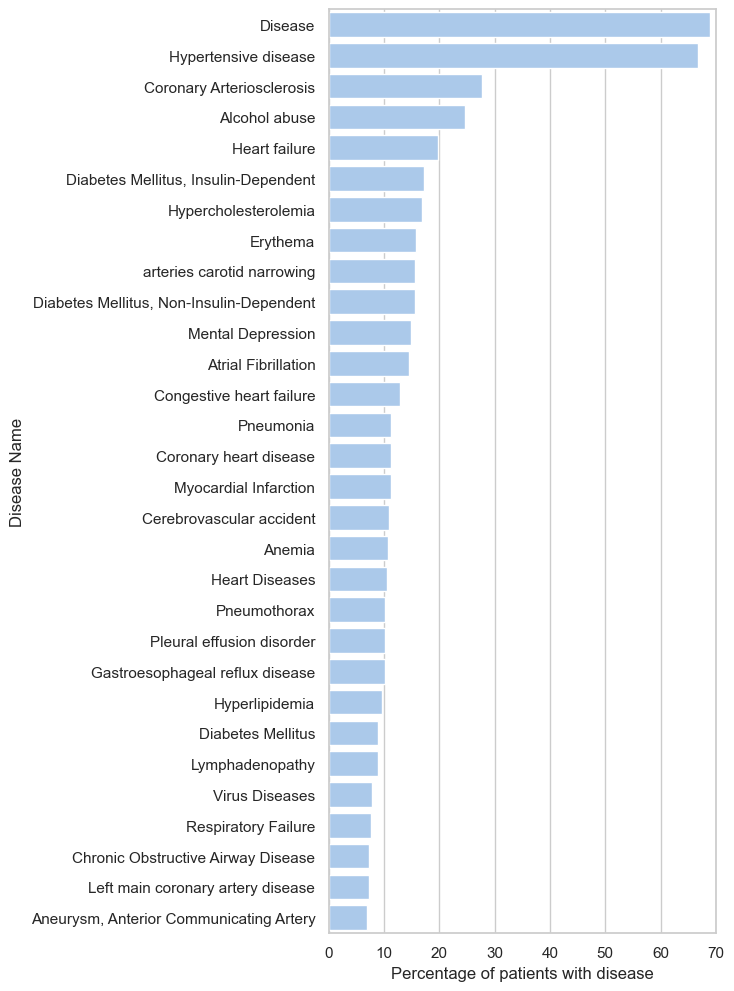

In [132]:
# Plot the top 30 diseases
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(5,12)}, 
    style="whitegrid",
    palette='pastel'
)
f, ax = plt.subplots()
_data = df_cui_nsubjects.iloc[0:30]
sns.barplot(x="perc_subjects", y="name", data=_data, label="Disorder Name", color="b")
_ = ax.set(xlim=(0, 70), ylabel="Disease Name", xlabel="Percentage of patients with disease")
plt.show()

# Preparing data for supervised training (MedCATtrainer)

As we want to do some fine-tuning on the models and also some meta-annotations (e.g. Status and Temporality), we'll take the top 100 CUIs from each TUI and for each take 2 examples. We'll do this because randomly choosing documents will give us only (most likely) the concepts on the very top by frequency (especially when there is a large drop between the top concepts).

The required output format for supervised training via MedCATtrainer is CSV with `columns=(name, text)`

In [133]:
df_cui_nsubjects.head()

cui  nsubjects type_ids                       name  perc_subjects
0  C0012634       6102   {T047}                    Disease      68.988129
1  C0020538       5900   {T047}       Hypertensive disease      66.704353
2  C0010054       2448   {T047}  Coronary Arteriosclerosis      27.676653
3  C0085762       2178   {T048}              Alcohol abuse      24.624081
4  C0018801       1755   {T047}              Heart failure      19.841718

In [134]:
# For each of the top 30 diseases/mental_disorders take 2 examples of documents/text
#where they appear
nexamples = 2
size = 40
loc_047_top = []
loc_048_top = []

for cui in df_cui_nsubjects[df_cui_nsubjects['type_ids'].apply(lambda x: 'T047' in x)]['cui'].values[0:size]:
    loc_047_top.extend(np.array(cui_location[cui])[np.random.randint(0, len(cui_location[cui]), nexamples)])
    
for cui in df_cui_nsubjects[df_cui_nsubjects['type_ids'].apply(lambda x: 'T048' in x)]['cui'].values[0:size]:
    loc_048_top.extend(np.array(cui_location[cui])[np.random.randint(0, len(cui_location[cui]), nexamples)])

data_047_top = data.iloc[loc_047_top]
data_048_top = data.iloc[loc_048_top]

In [135]:
# Combine everything
train_data = pd.concat([data_047_top, data_048_top])

In [136]:
train_data.head()

ROW_ID_x  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
5227     23269       22291  160388.0  2131-01-18       NaN       NaN   
2102      9829       11745  110070.0  2198-02-28       NaN       NaN   
7258     21271       11546  104867.0  2142-08-23       NaN       NaN   
4820     22648        3042  113262.0  2173-11-19       NaN       NaN   
1361     13261       20783  102947.0  2130-04-10       NaN       NaN   

               CATEGORY DESCRIPTION  CGID  ISERROR  ... CREATE_YEAR  ROW_ID_y  \
5227  Discharge summary      Report   NaN      NaN  ...        2131     21042   
2102  Discharge summary      Report   NaN      NaN  ...        2198     11112   
7258  Discharge summary      Report   NaN      NaN  ...        2142     10921   
4820  Discharge summary      Report   NaN      NaN  ...        2173      2881   
1361  Discharge summary      Report   NaN      NaN  ...        2130     19611   

      GENDER         DOB  DOD DOD_HOSP DOD_SSN EXPIRE_FLAG  DOB_YEAR  AGE_YEAR  
5227       F  2065-10-01  NaN      NaN     NaN           0      2065        66  
2102       M  2134-07-19  NaN      NaN     NaN           0      2134        64  
7258       M  2074-11-21  NaN      NaN     NaN           0      2074        68  
4820       M  2124-10-13  NaN      NaN     NaN           0      2124        49  
1361       F  2060-09-14  NaN      NaN     NaN           0      2060        70  

[5 rows x 21 columns]

In [144]:
train_data = train_data.rename(columns={'Unnamed: 0_x': "name"})
train_data = train_data[['SUBJECT_ID', 'TEXT']]
train_data.reset_index(drop=True, inplace=True)
train_data.head()

SUBJECT_ID                                               TEXT
0       22291  Admission Date: [**2131-1-15**]        Dischar...
1       11745  Admission Date:  [**2198-2-23**]       Dischar...
2       11546  Admission Date:  [**2142-8-22**]              ...
3        3042  Admission Date:  [**2173-11-10**]             ...
4       20783  Admission Date:  [**2130-4-4**]     Discharge ...

In [145]:
# Remove duplicates if we have them. 
train_data = train_data.drop_duplicates(['TEXT'])

# Save the data so that it can be imported into MedCATtrainer
train_data.to_csv(DATA_DIR + "train_data.csv", index=False)

End of Tutorial